In [2]:
# Data
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/stocks.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,02/07/2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,02/08/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,02/09/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,02/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,02/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,218.671448,221.334984,216.124871,218.801028,218.782052,3.208210e+07
std,104.283265,105.219203,103.025609,104.084010,104.078275,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,246.974998,250.964996,245.669998,247.430000,247.430000,2.734000e+07
75%,304.697495,307.800011,297.000000,304.507492,304.507492,4.771772e+07
max,1000.350006,1000.000000,1000.850006,1000.550003,1000.550003,1.133164e+08


In [6]:
df.Ticker.value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

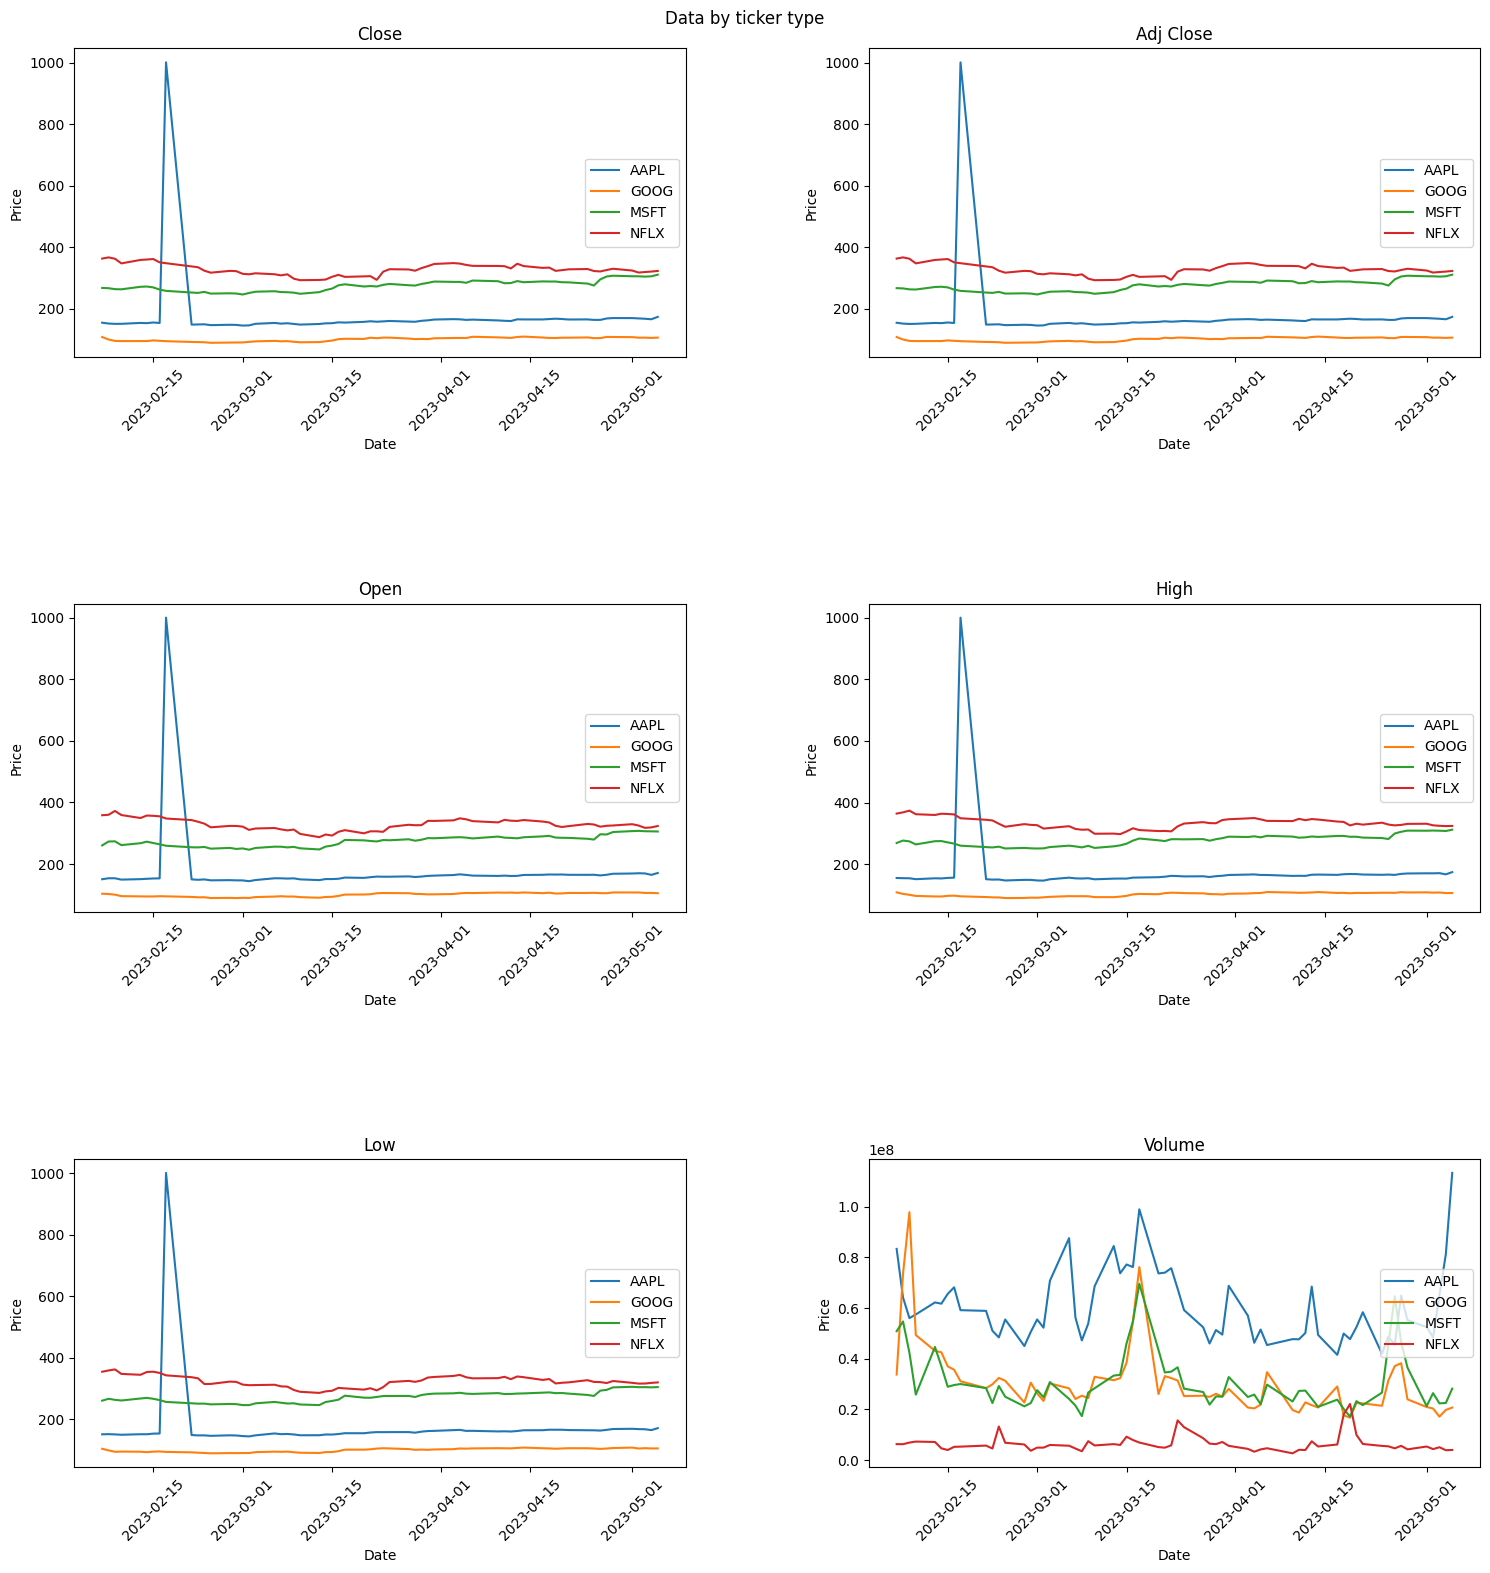

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')

cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    row = i // 2
    col = i % 2

    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)

    axs[row, col].set_title(cols[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()


In [9]:
df.dropna(subset=['Date', 'Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume'], inplace=True)

In [10]:
df.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)


In [11]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Close'] >= (Q1 - 1.5 * IQR)) & (df['Close'] <= (Q3 + 1.5 * IQR))]


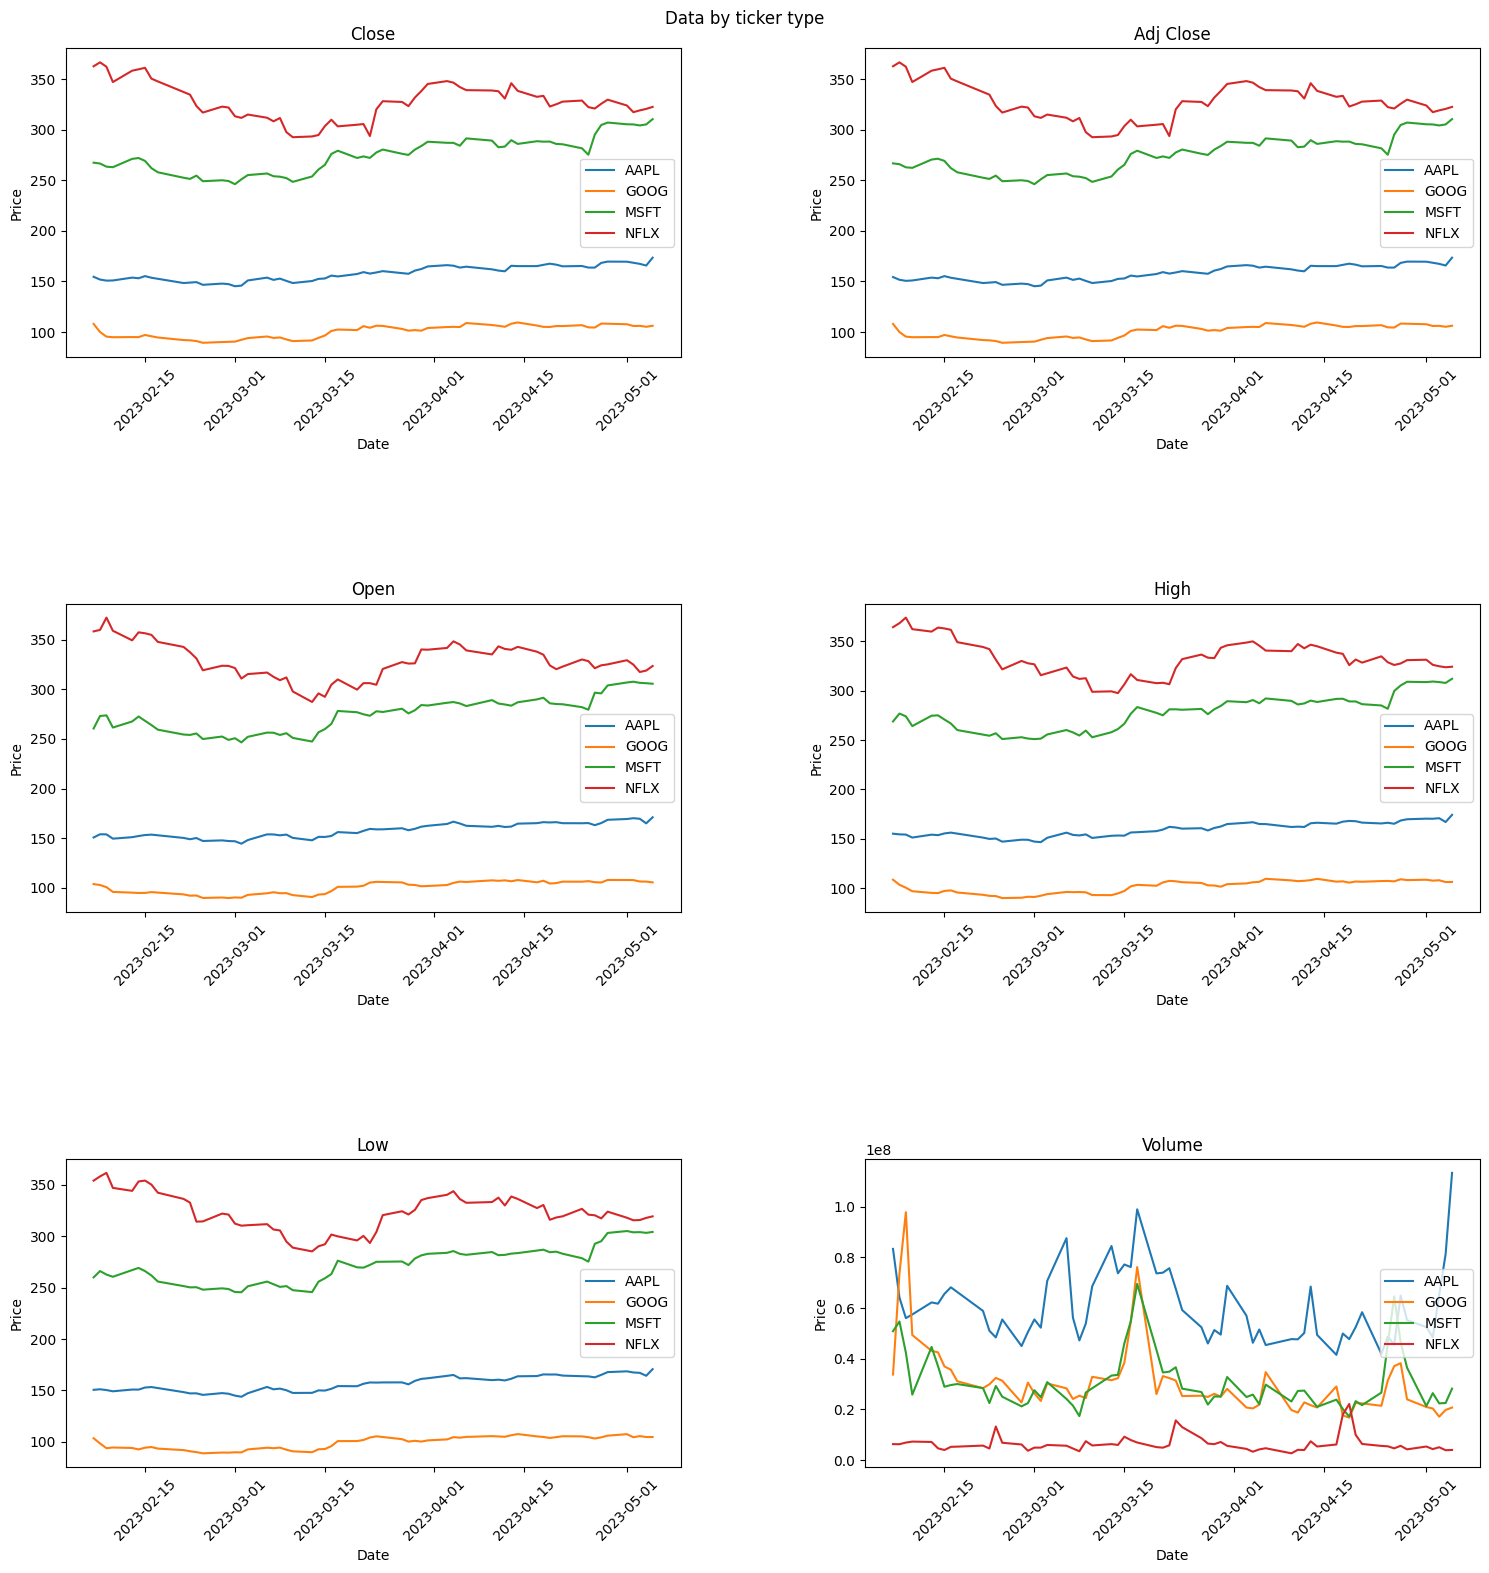

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))
fig.suptitle('Data by ticker type')

cols = ['Close', 'Adj Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(cols):
    row = i // 2
    col = i % 2

    for ticker, data in df.groupby('Ticker'):
        axs[row, col].plot(data['Date'], data[cols[i]], label=ticker)

    axs[row, col].set_title(cols[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend(loc='right')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()

(124   2023-02-07
 125   2023-02-08
 126   2023-02-09
 127   2023-02-10
 128   2023-02-13
          ...    
 181   2023-05-01
 182   2023-05-02
 183   2023-05-03
 184   2023-05-04
 185   2023-05-05
 Name: Date, Length: 62, dtype: datetime64[ns],
 <Axes: xlabel='Adj Close'>)

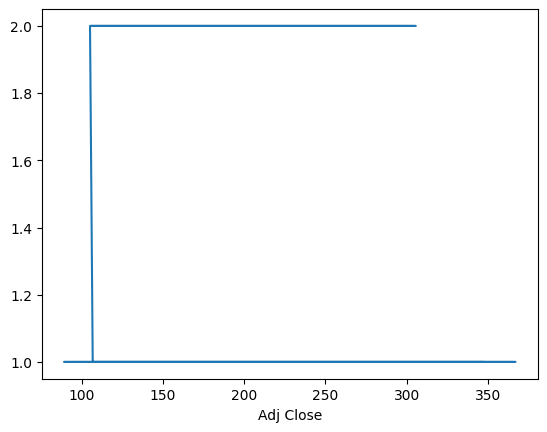

In [39]:
df['Adj Close'].value_counts().sort_values().plot.line()

<Axes: xlabel='Date'>

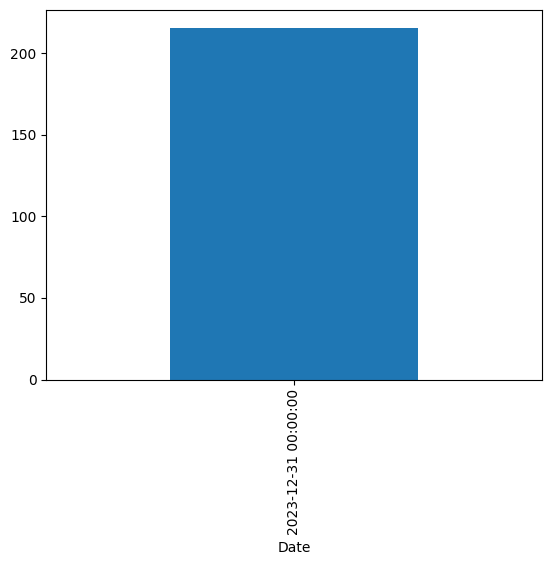

In [38]:
df['Close'].resample('Y').mean().plot.bar()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

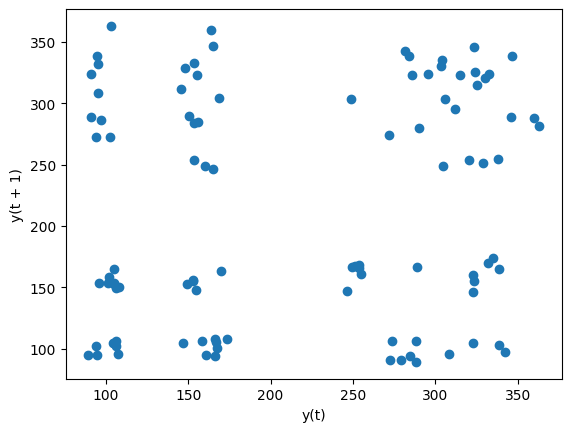

In [30]:
from pandas.plotting import lag_plot

lag_plot(df['Close'].sample(100))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

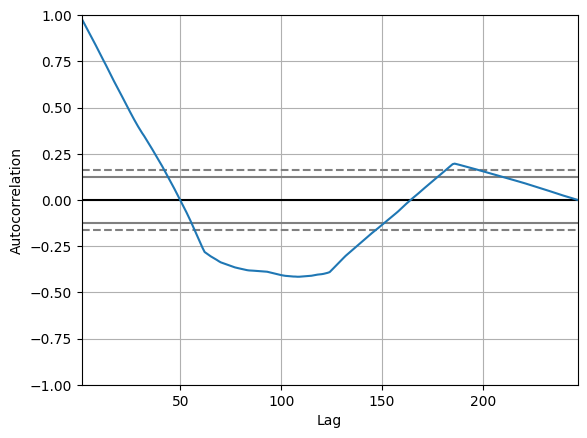

In [33]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Close'])